# Create Dataset

In [132]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

FOLDER_PATH = "dataset/hdd/"
CLASS_NAMES = ["א","ב","ג","ד","ה","ו","ז","ח","ט","י","כ","ך","ל","מ","ם","נ","ן","ס","ע","פ","ף","צ","ץ","ק","ר","ש","ת"]
builder = tfds.folder_dataset.ImageFolder(FOLDER_PATH, shape=(200,200,3))

In [133]:
builder.name = 'HHD_dataset'
print(builder.info)

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='HHD_dataset/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='dataset/hdd/',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(200, 200, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=27),
    }),
    supervised_keys=('image', 'label'),
    splits={
        'test': <SplitInfo num_examples=1055, num_shards=1>,
        'train': <SplitInfo num_examples=3785, num_shards=1>,
    },
    citation="""""",
)


In [139]:
train_dataset, test_dataset = builder.as_dataset(split=['train', 'test'] , shuffle_files=True)

def preprocess_simple(x):
    x["image"]= tf.image.resize(x["image"],size=(50,50))
    x["image"]= tf.image.rgb_to_grayscale(x["image"])
    x["image"]= tf.cast(x["image"], tf.float32)
    x["image"]= tf.divide(x["image"], 255.0)
    x["image"]= tf.squeeze(x["image"])
    return([x["image"], x["label"]])

train_dataset_float = train_dataset.map(preprocess_simple)

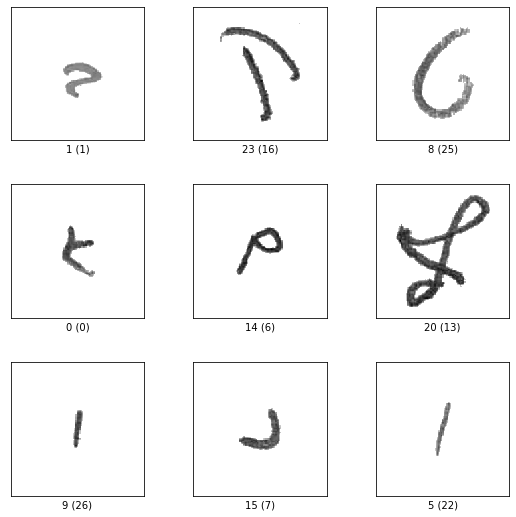

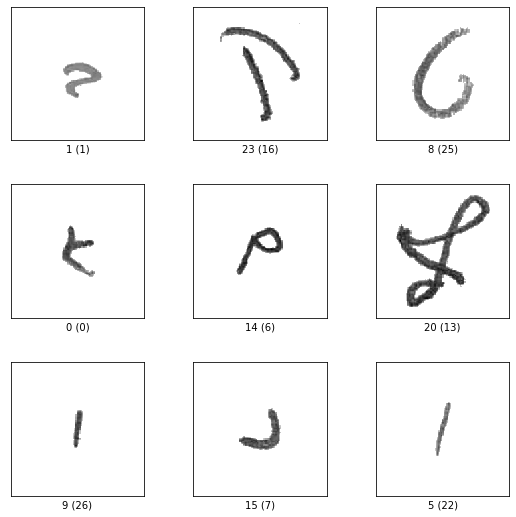

In [140]:
tfds.show_examples(train_dataset, builder.info)

In [141]:
for count_batch in train_dataset.shuffle(buffer_size=300).batch(10).take(3): ## iterate 3 times on batches with size 10
    x_batch, y_batch = count_batch["image"], count_batch["label"]
    print(count_batch['label'])

tf.Tensor([ 2 12  8  6  7  5 19 16  0  8], shape=(10,), dtype=int64)
tf.Tensor([15 13  2  2  6 23 12 11 18  9], shape=(10,), dtype=int64)
tf.Tensor([ 4  9  2  0  9 22 23 11  8 16], shape=(10,), dtype=int64)


In [142]:
for count_batch in train_dataset.batch(100): # iterate over the whole dataset one time with batch size 100
  print(count_batch['image'].shape)

(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(100, 200, 200, 3)
(85, 200, 200, 3)


# Train Simple Neural Net

In [41]:
import tensorflow as tf
from tensorflow import keras
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[50,50]))
model.add(keras.layers.Dense(1000, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(27, activation="softmax"))

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              2501000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 27)                2727      
Total params: 3,184,627
Trainable params: 3,184,627
Non-trainable params: 0
______________________________________________

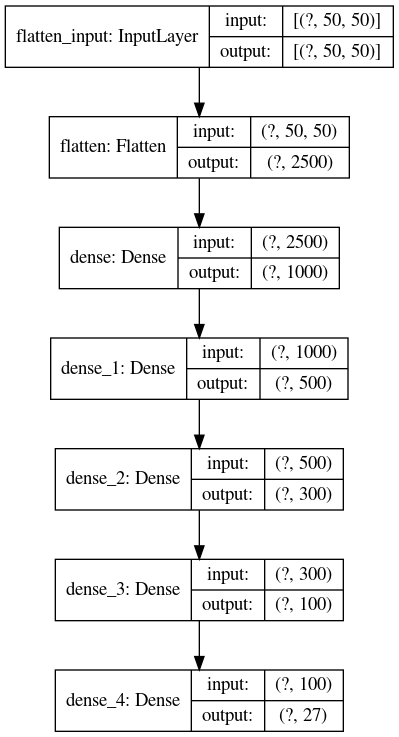

In [22]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",  # The sparse is because our labels are not in one hot codding
              optimizer="sgd",
              metrics=["accuracy"])

In [338]:
train_dataset_float = train_dataset_float.batch(4)
for x,y in train_dataset_float:
    print(x.shape, y.shape)
    break


(4, 50, 50) (4,)


In [370]:
history = model.fit(train_dataset_float, epochs=60, validation_data=test_dataset_float.batch(4))

Train for 947 steps, validate for 264 steps
Epoch 1/60
947/947 [==============================] - 8s 8ms/step - loss: 0.0419 - accuracy: 0.9841 - val_loss: 2.3359 - val_accuracy: 0.7242
Epoch 2/60
947/947 [==============================] - 8s 8ms/step - loss: 0.0563 - accuracy: 0.9826 - val_loss: 2.4294 - val_accuracy: 0.7100
Epoch 3/60
947/947 [==============================] - 9s 9ms/step - loss: 0.0533 - accuracy: 0.9818 - val_loss: 2.4681 - val_accuracy: 0.7043
Epoch 4/60
947/947 [==============================] - 9s 10ms/step - loss: 0.0402 - accuracy: 0.9836 - val_loss: 2.4671 - val_accuracy: 0.7166
Epoch 5/60
947/947 [==============================] - 9s 9ms/step - loss: 0.0599 - accuracy: 0.9786 - val_loss: 2.5601 - val_accuracy: 0.6673
Epoch 6/60
947/947 [==============================] - 9s 9ms/step - loss: 0.1789 - accuracy: 0.9458 - val_loss: 2.3388 - val_accuracy: 0.6948
Epoch 7/60
947/947 [==============================] - 9s 9ms/step - loss: 0.2961 - accuracy: 0.9165 - v

947/947 [==============================] - 8s 8ms/step - loss: 0.3057 - accuracy: 0.9226 - val_loss: 3.2699 - val_accuracy: 0.5545
Epoch 59/60
947/947 [==============================] - 8s 8ms/step - loss: 0.1239 - accuracy: 0.9575 - val_loss: 2.1878 - val_accuracy: 0.7109
Epoch 60/60
947/947 [==============================] - 8s 9ms/step - loss: 0.0464 - accuracy: 0.9839 - val_loss: 2.3300 - val_accuracy: 0.7175


In [371]:
history.params

{'batch_size': None,
 'epochs': 60,
 'steps': 947,
 'samples': 947,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [372]:
import time
t_start = time.time()
pred = model.predict_classes(x)
print(time.time()-t_start)
print(pred,y)

0.018286466598510742
[13  7 15 24] tf.Tensor([13  7 15 24], shape=(4,), dtype=int64)


In [115]:
test_dataset_float = test_dataset.map(filter_fn)

In [29]:
model.evaluate(test_dataset_float.batch(1))

1055/1055 [==============================] - 2s 1ms/step - loss: 2.3252 - accuracy: 0.7175


[2.325197728000627, 0.71753556]

In [39]:
model.save("hhd_simple_model")

INFO:tensorflow:Assets written to: hhd_simple_model/assets


INFO:tensorflow:Assets written to: hhd_simple_model/assets


In [43]:
model_1 = keras.models.load_model("hhd_simple_model")

In [38]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              2501000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 27)                2727      
Total params: 3,184,627
Trainable params: 3,184,627
Non-trainable params: 0
______________________________________________

In [376]:
model.save_weights("hhd_keras_weights.ckpt")

In [24]:
model.load_weights("hhd_keras_weights.ckpt")

In [31]:
model.save("my_keras_model.h5")

In [117]:
iterator = test_dataset_float.as_numpy_iterator()
x = list(iterator)
x= np.array(x)
x_test, y_test = x[:,0], x[:,1]
print(x_test.shape)

(1055,)


In [106]:
pred = model.predict(np.squeeze(x_test))

ValueError: Error when checking input: expected flatten_input to have 3 dimensions, but got array with shape (1055, 1)

# Train Conv NN

In [204]:
import tensorflow as tf
from tensorflow import keras
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [205]:
train_dataset, test_dataset = builder.as_dataset(split=['train', 'test'] , shuffle_files=True)

def preprocess_conv(x):
    x["image"]= tf.image.resize(x["image"],size=(50,50))
    x["image"]= tf.image.rgb_to_grayscale(x["image"])
    x["image"]= tf.cast(x["image"], tf.float32)
    x["image"]= tf.divide(x["image"], 255.0)
    return([x["image"], x["label"]])

train_dataset_float = train_dataset.map(preprocess_conv)
test_dataset_float = test_dataset.map(preprocess_conv)

In [206]:
conv_model = keras.models.Sequential()
conv_model.add(keras.Input(shape=(50,50,1)))
conv_model.add(keras.layers.Conv2D(16, kernel_size=(3,3),activation="relu"))
conv_model.add(keras.layers.MaxPool2D((2,2)))
conv_model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"))
conv_model.add(keras.layers.MaxPool2D((2,2)))
conv_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
conv_model.add(keras.layers.Flatten())
conv_model.add(keras.layers.Dense(500, activation="relu"))
conv_model.add(keras.layers.Dense(100, activation="relu"))
conv_model.add(keras.layers.Dense(27, activation="softmax"))

In [207]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               2

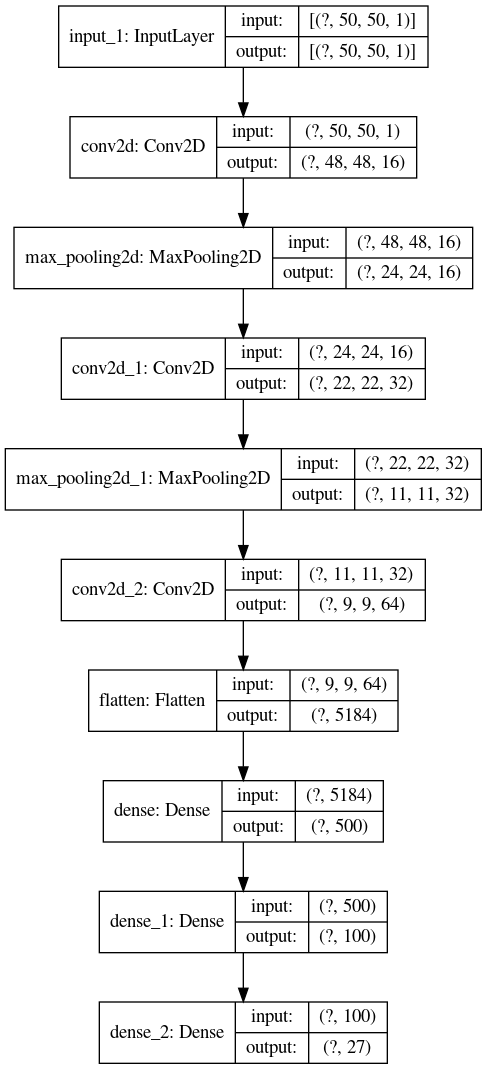

In [208]:
keras.utils.plot_model(conv_model, "hhd_conv/hhd_conv_model.png", show_shapes=True)

In [209]:
conv_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.Adam(lr=1e-3),
                   metrics=["accuracy"])

## tensorboard

In [210]:
import os
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join("hhd_conv/tensorboard", run_id)
run_logdir = get_run_logdir()

In [211]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("hdd_conv/hhd_conv_model", save_best_only=True) # save the best model
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True) # Stop after 10 unchanged epochs
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir) # TensorBoard


In [212]:
conv_model.fit(train_dataset_float.batch(10), 
               epochs=100,
               validation_data=test_dataset_float.batch(4),
               callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Train for 379 steps, validate for 264 steps
Epoch 1/100
378/379 [============================>.] - ETA: 0s - loss: 2.2149 - accuracy: 0.3550INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


379/379 [==============================] - 9s 23ms/step - loss: 2.2125 - accuracy: 0.3556 - val_loss: 1.1847 - val_accuracy: 0.6351
Epoch 2/100
376/379 [============================>.] - ETA: 0s - loss: 0.8843 - accuracy: 0.7285INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


379/379 [==============================] - 8s 22ms/step - loss: 0.8846 - accuracy: 0.7287 - val_loss: 0.7734 - val_accuracy: 0.7754
Epoch 3/100
378/379 [============================>.] - ETA: 0s - loss: 0.5563 - accuracy: 0.8246INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


379/379 [==============================] - 8s 22ms/step - loss: 0.5569 - accuracy: 0.8246 - val_loss: 0.6948 - val_accuracy: 0.7915
Epoch 4/100
377/379 [============================>.] - ETA: 0s - loss: 0.3844 - accuracy: 0.8698INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


379/379 [==============================] - 9s 24ms/step - loss: 0.3845 - accuracy: 0.8692 - val_loss: 0.6575 - val_accuracy: 0.8142
Epoch 5/100
379/379 [==============================] - 9s 22ms/step - loss: 0.3098 - accuracy: 0.8946 - val_loss: 0.6708 - val_accuracy: 0.8066
Epoch 6/100
379/379 [==============================] - 8s 22ms/step - loss: 0.2257 - accuracy: 0.9250 - val_loss: 0.7485 - val_accuracy: 0.8000
Epoch 7/100
379/379 [==============================] - 9s 24ms/step - loss: 0.1743 - accuracy: 0.9435 - val_loss: 0.8272 - val_accuracy: 0.8009
Epoch 8/100
379/379 [==============================] - 8s 22ms/step - loss: 0.1584 - accuracy: 0.9519 - val_loss: 0.8993 - val_accuracy: 0.7924
Epoch 9/100
379/379 [==============================] - 8s 22ms/step - loss: 0.1428 - accuracy: 0.9524 - val_loss: 0.8875 - val_accuracy: 0.8047
Epoch 10/100
379/379 [==============================] - 9s 24ms/step - loss: 0.1234 - accuracy: 0.9593 - val_loss: 0.9960 - val_accuracy: 0.8047
Epo

## Now for image augmentation

In [303]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [304]:
train_datagen = ImageDataGenerator(
        rescale=1./255.0,
        zoom_range=0.3,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        brightness_range=[0,0.3])
test_datagen = ImageDataGenerator(rescale=1./255.0)


In [305]:
train_generator = train_datagen.flow_from_directory(
        '/home/yossi/Projects/hhd_classifier/dataset/hdd/train',
        target_size=(50, 50),
        batch_size=16,
        color_mode="grayscale",
        class_mode='sparse')
test_generator = test_datagen.flow_from_directory(
        '/home/yossi/Projects/hhd_classifier/dataset/hdd/test',
        target_size=(50, 50),
        batch_size=10,
        color_mode="grayscale",
        class_mode='sparse')

Found 3785 images belonging to 27 classes.
Found 1055 images belonging to 27 classes.


In [312]:
conv_model = keras.models.Sequential()
conv_model.add(keras.Input(shape=(50,50,1)))
conv_model.add(keras.layers.Conv2D(16, kernel_size=(3,3),activation="relu"))
conv_model.add(keras.layers.BatchNormalization())
conv_model.add(keras.layers.MaxPool2D((2,2)))
conv_model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"))
conv_model.add(keras.layers.BatchNormalization())
conv_model.add(keras.layers.MaxPool2D((2,2)))
conv_model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
conv_model.add(keras.layers.BatchNormalization())
conv_model.add(keras.layers.Flatten())
conv_model.add(keras.layers.Dense(1000, activation="relu"))
conv_model.add(keras.layers.Dense(500, activation="relu"))
conv_model.add(keras.layers.Dense(27, activation="softmax"))

In [321]:
conv_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer=keras.optimizers.Adam(lr=1e-3),
                   metrics=["accuracy"])

In [314]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("hdd_conv/hhd_conv_model", save_best_only=True) # save the best model
early_stopping_cb = keras.callbacks.EarlyStopping(patience=30,
                                                  restore_best_weights=True) # Stop after 20 unchanged epochs
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir()) # TensorBoard

In [318]:
conv_model.fit(train_generator, 
               epochs=300,
               validation_data=test_generator,
               callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 237 steps, validate for 106 steps
Epoch 1/300
237/237 [==============================] - 10s 43ms/step - loss: 0.6027 - accuracy: 0.8085 - val_loss: 1.1650 - val_accuracy: 0.8095
Epoch 2/300
237/237 [==============================] - 10s 43ms/step - loss: 0.5869 - accuracy: 0.8151 - val_loss: 1.4443 - val_accuracy: 0.8275
Epoch 3/300
237/237 [==============================] - 10s 43ms/step - loss: 0.5822 - accuracy: 0.8140 - val_loss: 1.0556 - val_accuracy: 0.8246
Epoch 4/300
237/237 [==============================] - 10s 43ms/step - loss: 0.5634 - accuracy: 0.8275 - val_loss: 1.9339 - val_accuracy: 0.7981
Epoch 5/300
237/237 [==============================] - 10s 43ms/step - loss: 0.5508 - accuracy: 0.8246 - val_loss: 1.0593 - val_accuracy: 0.8123
Epoch 6/300
237/237 [==============================] - 10s 43ms/step - loss: 0.5687 - accuracy: 0.8217 - val_loss: 1.4547 - val_accuracy: 0.7962
Epoch 7/300
237/237 [==============================] - 11s 45ms/step - loss: 0.5472 - 

INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


237/237 [==============================] - 11s 47ms/step - loss: 0.4904 - accuracy: 0.8491 - val_loss: 0.9601 - val_accuracy: 0.8246
Epoch 12/300
237/237 [==============================] - 10s 43ms/step - loss: 0.5569 - accuracy: 0.8299 - val_loss: 1.2721 - val_accuracy: 0.8237
Epoch 13/300
237/237 [==============================] - 10s 43ms/step - loss: 0.5207 - accuracy: 0.8333 - val_loss: 1.2807 - val_accuracy: 0.8360
Epoch 14/300
235/237 [============================>.] - ETA: 0s - loss: 0.5152 - accuracy: 0.8332INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model/assets


237/237 [==============================] - 11s 48ms/step - loss: 0.5158 - accuracy: 0.8330 - val_loss: 0.8479 - val_accuracy: 0.8502
Epoch 15/300
237/237 [==============================] - 10s 43ms/step - loss: 0.5026 - accuracy: 0.8378 - val_loss: 0.9924 - val_accuracy: 0.8616
Epoch 16/300
237/237 [==============================] - 10s 43ms/step - loss: 0.4972 - accuracy: 0.8402 - val_loss: 0.9666 - val_accuracy: 0.8483
Epoch 17/300
237/237 [==============================] - 10s 43ms/step - loss: 0.4987 - accuracy: 0.8428 - val_loss: 0.9367 - val_accuracy: 0.8483
Epoch 18/300
237/237 [==============================] - 10s 43ms/step - loss: 0.5019 - accuracy: 0.8373 - val_loss: 1.3734 - val_accuracy: 0.8417
Epoch 19/300
237/237 [==============================] - 10s 43ms/step - loss: 0.4890 - accuracy: 0.8444 - val_loss: 1.1504 - val_accuracy: 0.8408
Epoch 20/300
237/237 [==============================] - 10s 43ms/step - loss: 0.4725 - accuracy: 0.8494 - val_loss: 1.8237 - val_accuracy

In [325]:
conv_model.save("hdd_conv/hhd_conv_model_latest")

INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model_latest/assets


INFO:tensorflow:Assets written to: hdd_conv/hhd_conv_model_latest/assets


In [310]:
for name in train_generator.filenames:
    print(name.split('/')[0])

001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
001
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002
002


017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
017
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
018
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019
019


In [324]:
conv_model.evaluate(test_generator)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


106/106 [==============================] - 1s 7ms/step - loss: 0.8479 - accuracy: 0.8502


[0.8479250311635419, 0.85023695]